In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os, glob
import cv2
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from tqdm import tqdm

import torch
import torch.nn as nn
import torchvision
from torch.utils.data import DataLoader
from torchvision.datasets import ImageFolder

import warnings as wrn
wrn.filterwarnings('ignore')

In [ ]:
!unzip '/content/drive/MyDrive/ZSClassification/ZeroShotHandwrittenCharacterRecognition/BanglaCMATERdb/BanglaCharacterDataset.zip'

In [ ]:
ROOT_DIR = '/content/Dataset'

In [ ]:
train_set_root = os.path.join(ROOT_DIR, 'Train')
test_set_root = os.path.join(ROOT_DIR, 'Test')

transform = torchvision.transforms.Compose([
    torchvision.transforms.Resize((28, 28)),
    torchvision.transforms.ToTensor(),
    torchvision.transforms.Normalize((0.5), (0.5))
])

train_loader = DataLoader(
    ImageFolder(train_set_root, transform=transform),
    batch_size = 32, shuffle = True, pin_memory = True, drop_last = True, num_workers = 2
)

test_loader = DataLoader(
    ImageFolder(test_set_root, transform=transform),
    batch_size = 32, shuffle = True, pin_memory = True, drop_last = True, num_workers = 2
)

In [ ]:
num_classes = len(os.listdir(train_set_root))
device = 'cuda' if torch.cuda.is_available() else 'cpu'

In [ ]:
class Autoencoder(nn.Module):
    def __init__(self):
        super().__init__()
        self.encoder = nn.Sequential(
            nn.Conv2d(in_channels=3, out_channels=16, kernel_size=3, stride=2, padding=1),
            nn.ReLU(),
            nn.Conv2d(in_channels=16, out_channels=32, kernel_size=3, stride=2, padding=1),
            nn.ReLU(),
            nn.Conv2d(in_channels=32, out_channels=64, kernel_size=7),
        )

        self.decoder = nn.Sequential(
            nn.ConvTranspose2d(in_channels=64, out_channels=32, kernel_size=7),
            nn.ReLU(),
            nn.ConvTranspose2d(in_channels=32, out_channels=16, kernel_size=3, stride=2, padding=1, output_padding=1),
            nn.ReLU(),
            nn.ConvTranspose2d(in_channels=16, out_channels=3, kernel_size=3, stride=2, padding=1, output_padding=1),
            nn.Sigmoid()
        )

    def forward(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return encoded, decoded

In [ ]:
model = Autoencoder().to(device)
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3, weight_decay=1e-5)

In [ ]:
outputs = []
for epoch in range(50):
    for (imgs, _) in tqdm(train_loader):
        imgs = imgs.to(device)
        embd, recon = model(imgs.to(device))
        # print(embd.shape)
        loss = criterion(recon, imgs)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        # break
    print(f"Epoch: {epoch+1}, Loss: {loss.item():.4f}")
    outputs.append((epoch, imgs, recon))
    # break

100%|██████████| 375/375 [00:13<00:00, 28.19it/s]


Epoch: 1, Loss: 0.1941


100%|██████████| 375/375 [00:07<00:00, 52.96it/s]


Epoch: 2, Loss: 0.2271


100%|██████████| 375/375 [00:05<00:00, 69.04it/s]


Epoch: 3, Loss: 0.2023


100%|██████████| 375/375 [00:07<00:00, 53.23it/s]


Epoch: 4, Loss: 0.1977


100%|██████████| 375/375 [00:05<00:00, 66.01it/s]


Epoch: 5, Loss: 0.1841


100%|██████████| 375/375 [00:07<00:00, 50.81it/s]


Epoch: 6, Loss: 0.2042


100%|██████████| 375/375 [00:05<00:00, 64.30it/s]


Epoch: 7, Loss: 0.1961


100%|██████████| 375/375 [00:10<00:00, 34.70it/s]


Epoch: 8, Loss: 0.1957


100%|██████████| 375/375 [00:07<00:00, 49.51it/s]


Epoch: 9, Loss: 0.2023


100%|██████████| 375/375 [00:07<00:00, 50.38it/s]


Epoch: 10, Loss: 0.2076


100%|██████████| 375/375 [00:05<00:00, 67.66it/s]


Epoch: 11, Loss: 0.1870


100%|██████████| 375/375 [00:07<00:00, 51.51it/s]


Epoch: 12, Loss: 0.2055


100%|██████████| 375/375 [00:05<00:00, 68.94it/s]


Epoch: 13, Loss: 0.1745


100%|██████████| 375/375 [00:06<00:00, 59.15it/s]


Epoch: 14, Loss: 0.1856


100%|██████████| 375/375 [00:06<00:00, 60.01it/s]


Epoch: 15, Loss: 0.1679


100%|██████████| 375/375 [00:05<00:00, 67.42it/s]


Epoch: 16, Loss: 0.1700


100%|██████████| 375/375 [00:07<00:00, 52.28it/s]


Epoch: 17, Loss: 0.1701


100%|██████████| 375/375 [00:05<00:00, 69.51it/s]


Epoch: 18, Loss: 0.1863


100%|██████████| 375/375 [00:07<00:00, 51.65it/s]


Epoch: 19, Loss: 0.1735


100%|██████████| 375/375 [00:05<00:00, 68.32it/s]


Epoch: 20, Loss: 0.2027


100%|██████████| 375/375 [00:07<00:00, 52.52it/s]


Epoch: 21, Loss: 0.1683


100%|██████████| 375/375 [00:05<00:00, 66.04it/s]


Epoch: 22, Loss: 0.1748


100%|██████████| 375/375 [00:07<00:00, 48.58it/s]


Epoch: 23, Loss: 0.1803


100%|██████████| 375/375 [00:06<00:00, 62.45it/s]


Epoch: 24, Loss: 0.1708


100%|██████████| 375/375 [00:05<00:00, 65.40it/s]


Epoch: 25, Loss: 0.1937


100%|██████████| 375/375 [00:07<00:00, 52.17it/s]


Epoch: 26, Loss: 0.1773


100%|██████████| 375/375 [00:05<00:00, 67.31it/s]


Epoch: 27, Loss: 0.1860


100%|██████████| 375/375 [00:07<00:00, 50.96it/s]


Epoch: 28, Loss: 0.1825


100%|██████████| 375/375 [00:05<00:00, 68.61it/s]


Epoch: 29, Loss: 0.1723


100%|██████████| 375/375 [00:07<00:00, 51.81it/s]


Epoch: 30, Loss: 0.1955


100%|██████████| 375/375 [00:05<00:00, 68.77it/s]


Epoch: 31, Loss: 0.1857


100%|██████████| 375/375 [00:06<00:00, 58.80it/s]


Epoch: 32, Loss: 0.1848


100%|██████████| 375/375 [00:06<00:00, 61.46it/s]


Epoch: 33, Loss: 0.1893


100%|██████████| 375/375 [00:05<00:00, 68.80it/s]


Epoch: 34, Loss: 0.1829


100%|██████████| 375/375 [00:07<00:00, 53.13it/s]


Epoch: 35, Loss: 0.1788


100%|██████████| 375/375 [00:05<00:00, 67.94it/s]


Epoch: 36, Loss: 0.1916


100%|██████████| 375/375 [00:07<00:00, 52.05it/s]


Epoch: 37, Loss: 0.1945


100%|██████████| 375/375 [00:05<00:00, 67.13it/s]


Epoch: 38, Loss: 0.1756


100%|██████████| 375/375 [00:07<00:00, 52.84it/s]


Epoch: 39, Loss: 0.1743


100%|██████████| 375/375 [00:05<00:00, 67.90it/s]


Epoch: 40, Loss: 0.1786


100%|██████████| 375/375 [00:06<00:00, 61.62it/s]


Epoch: 41, Loss: 0.1818


100%|██████████| 375/375 [00:06<00:00, 57.44it/s]


Epoch: 42, Loss: 0.1826


100%|██████████| 375/375 [00:05<00:00, 68.07it/s]


Epoch: 43, Loss: 0.1779


100%|██████████| 375/375 [00:07<00:00, 52.58it/s]


Epoch: 44, Loss: 0.1868


100%|██████████| 375/375 [00:05<00:00, 68.45it/s]


Epoch: 45, Loss: 0.1743


100%|██████████| 375/375 [00:07<00:00, 52.61it/s]


Epoch: 46, Loss: 0.1668


100%|██████████| 375/375 [00:06<00:00, 56.38it/s]


Epoch: 47, Loss: 0.1590


100%|██████████| 375/375 [00:07<00:00, 52.23it/s]


Epoch: 48, Loss: 0.1832


100%|██████████| 375/375 [00:05<00:00, 67.54it/s]


Epoch: 49, Loss: 0.1905


100%|██████████| 375/375 [00:06<00:00, 58.04it/s]

Epoch: 50, Loss: 0.1730


In [ ]:
test_transform = torchvision.transforms.Compose([
    torchvision.transforms.ToPILImage(),
    torchvision.transforms.Resize((28, 28)),
    torchvision.transforms.ToTensor(),
    torchvision.transforms.Normalize((0.5), (0.5)),
])

embeddings = []
for idx in range(172, 172+50):
    img_path = f'/content/Dataset/Test/{idx}/bcc000000.bmp'
    img = test_transform(cv2.imread(img_path))
    # print(img.shape)

    embd, recon = model(img.unsqueeze(0).to(device))
    embd = embd.view(-1, 64)
    # print(embd.shape, recon.shape)
    embeddings.append(list(embd[0].cpu().detach().numpy()))

np.array(embeddings).shape

(50, 64)

In [ ]:
import pandas as pd
from gensim.models.callbacks import CallbackAny2Vec
from gensim.models import Word2Vec
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

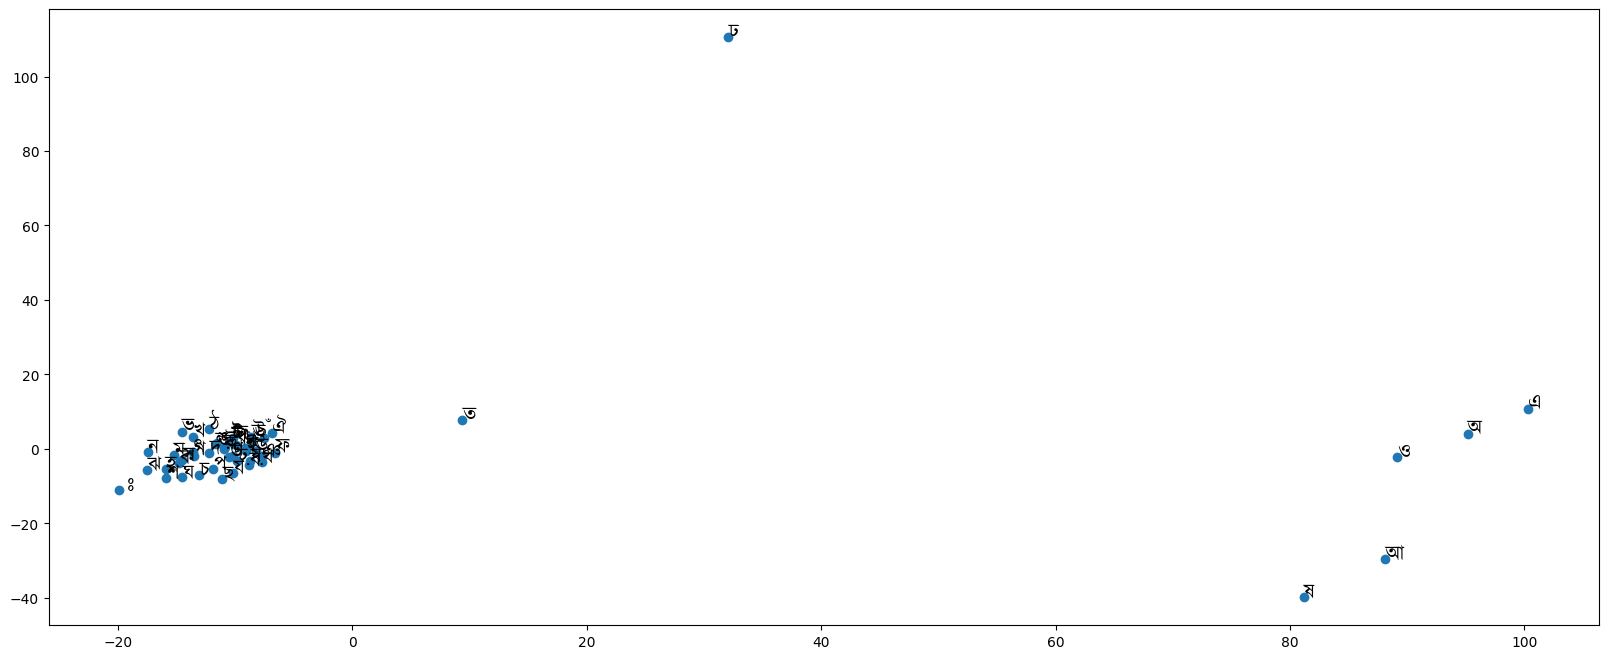

In [ ]:
prop = fm.FontProperties(fname='/content/drive/MyDrive/ZSClassification/ZeroShotHandwrittenCharacterRecognition/BanglaCMATERdb/kalpurush.ttf')

X = embeddings
pca = PCA(n_components=2)
result = pca.fit_transform(X)

plt.figure(figsize=(20, 8))
plt.scatter(result[:, 0], result[:, 1])

chars = [
    'অ', 'আ', 'ই', 'ঈ', 'উ', 'ঊ', 'ঋ', 'এ', 'ঐ', 'ও', 'ঔ', 'ক', 'খ', 'গ', 'ঘ', 'ঙ', 'চ', 'ছ', 'জ', 'ঝ', 'ঞ', 'ট', 'ঠ', 'ড',
    'ঢ', 'ণ', 'ত', 'থ', 'দ', 'ধ', 'ন', 'প', 'ফ', 'ব', 'ভ', 'ম', 'য', 'র', 'ল', 'শ', 'ষ', 'স', 'হ', 'ড়', 'ঢ়', 'য়', 'ৎ',' ং',' ঃ', ' ঁ',
    # 'অনুস্বার','বিসর্গ', 'চন্দ্রবিন্দু'
]

for i, char in enumerate(chars):
    plt.annotate(
        char,
        xy = (result[i, 0], result[i, 1]),
        fontproperties=prop,
        fontsize=15
    )

plt.show()